# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

---

### Calcolo dell'integrale tramite metodi Monte Carlo

Si calcola numericamente il seguente integrale:

$$I = \int_0^1 \frac{\pi}{2}\cos\big(\frac{\pi x}{2}\big) dx = 1$$

Attraverso due modalità differenti di metodo Monte Carlo, ovvero campionando da una distribuzione uniforme $[0,1)$, e utilizzando l'importance sampling, ovvero campionando da una distribuzione non uniforme in $[0,1)$. Per ogni simulazione vengono calcolati valor medio e relativa incertezza statistica tramite il metodo *data blocking*.

In primo luogo si valuta l'integrale nel modo seguente:

$$I = \int_0^1 g(x)p(x)dx $$

dove $p(x)$ è una distribuzione uniforme in $[0,1)$ e $g(x)=\frac{\pi}{2}\cos(\pi x/2)$.
In questo modo si calcola semplicemente il valore di aspettazione di $g(x)$ secondo la distribuzione di probabilità $p(x)$. In questa simulazione vengono usate $10^4$ misurazioni suddivise in $100$ blocchi.

L'importance sampling è invece una tecnica è una tecnica di calcolo che permette di utilizzare una distribuzione non uniforme, riscrivendo l'integrale che si vuole calcolare nel modo seguente:

$$I = \int_0^1 \frac{g(x)p(x)}{d(x)}\cdot d(x)\,dx $$

il metodo afferma che se $d(x)$ viene scelta il più possibile simile all'integranda $g(x)p(x)$, ciò riduce sensibilmente l'incertezza del risultato e ne velocizza la convergenza.

Si sceglie a tal proposito la seguente funzione $d(x)=2(1-x)$, e da questa si ricava la corrispetiva cumulativa $D(x)=2x-x^2$.
A questo punto si campiona la variabile $x$ invertendo la cumulativa $D$, per cui $x = D^{-1}(y) = \sqrt{1-y} + 1$.

Anche in questo caso per il calcolo numerico vengono effettuate $10^4$ misure suddivise in $100$ blocchi per tutti i dati.

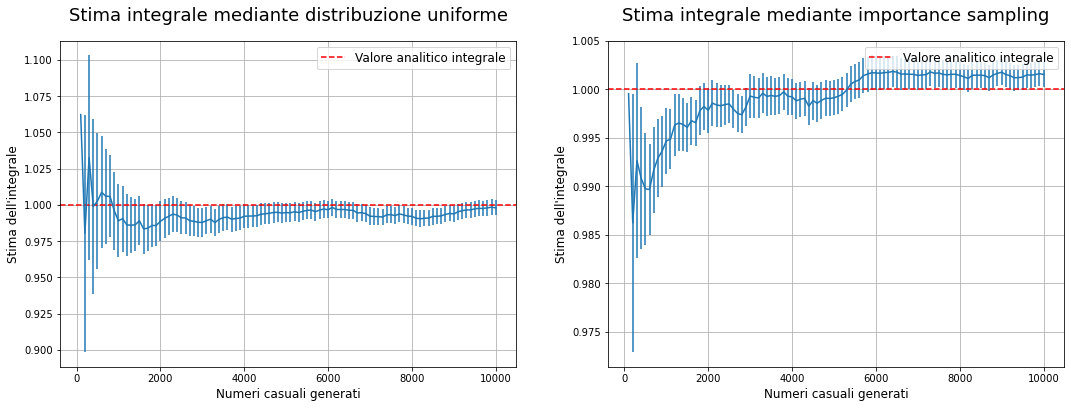

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

integrali = np.loadtxt('results_integral.dat')
integrali_g = np.loadtxt('results_integral_gauss.dat')


blocchi = integrali[:, 0]
medie = integrali[:, 1]
deviazioni = integrali[:, 2]

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.title("Stima integrale mediante distribuzione uniforme",fontsize=18,pad=20)
plt.errorbar(blocchi, medie, yerr=deviazioni)
plt.xlabel('Numeri casuali generati', fontsize=12)
plt.ylabel('Stima dell\'integrale', fontsize=12)
plt.axhline(y=1, color='red', linestyle='--', label='Valore analitico integrale')
plt.grid(True)
plt.legend(fontsize=12)


blocchi = integrali_g[:, 0]
medie = integrali_g[:, 1]
deviazioni = integrali_g[:, 2]


plt.subplot(1,2,2)
plt.title("Stima integrale mediante importance sampling",fontsize=18,pad=20)
plt.errorbar(blocchi, medie, yerr=deviazioni)
plt.xlabel('Numeri casuali generati', fontsize=12)
plt.ylabel('Stima dell\'integrale', fontsize=12)
plt.axhline(y=1, color='red', linestyle='--', label='Valore analitico integrale')
plt.grid(True)
plt.legend(fontsize=12)

plt.show()

Si osserva come nel caso dell'integrale $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$, le misurazioni sono compatibili certamente con il valore atteso. Ci si aspettava che l'importance sampling fornisse misurazioni più precise: così non accade probabilmente perchè non è stata scelta una funzione $d(x)$ particolarmente idonea.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

---

### Simulazione di Random Walks

Per simulare $10^4$ volte un random walk tridimensionale e calcolare la diffusione, ovvero della grandezza $\sqrt{\langle|\vec{r}_N|^2\rangle}$, viene implementata una classe RW in modo tale che abbia un costruttore che inizializzi $10^4$ vettori a tre componenti, e due metodi 'DiscreteStep' e 'ContinuousStep' tali che effettuino uno step di random walk per ogni vettore rispettivamente estraendo casualmente una direzione e aggiungendo o sottraendo $a=1$, ed estraendo casualmente gli angoli polare $\theta$ e azimutale $\phi$, in modo tale da effettuare un passo di lunghezza unitaria in una direzione random.

Nei due casi di random walk discreto o continuo, si calcola quindi la grandezza $\sqrt{\langle|\vec{r}_N|^2\rangle}$ per tutti i punti per cui viene simulato il RW per ogni passo, così da valutarne la media e l'incertezza statistica dopo ogni passo, fino ad arrivare ad un numero di passi pari a 100.

Prima di tutto si possono mostrare graficamente due simulazioni di un random walk tridimensionale discreto e continuo (quelli associati al primo punto della simulazione), per poi passare all'analisi statistica.

In [2]:
from mpl_toolkits.mplot3d import Axes3D

data = np.loadtxt("evolution_discrete_rw.dat")

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Creo la figura 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [3]:
data = np.loadtxt("evolution_continuous_rw.dat")

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Creo la figura 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Si notano delle differenze sostanziali fra le due tipologie di random walk. Sembrerebbe che questi siano stati simulati correttamente.

Si può determinare ora come scala la diffusione per le due tipologie di random walk in funzione del numero di passi $N$, per verificare se essa segue l'andamento teorico (che sacala come la radice di $N$).

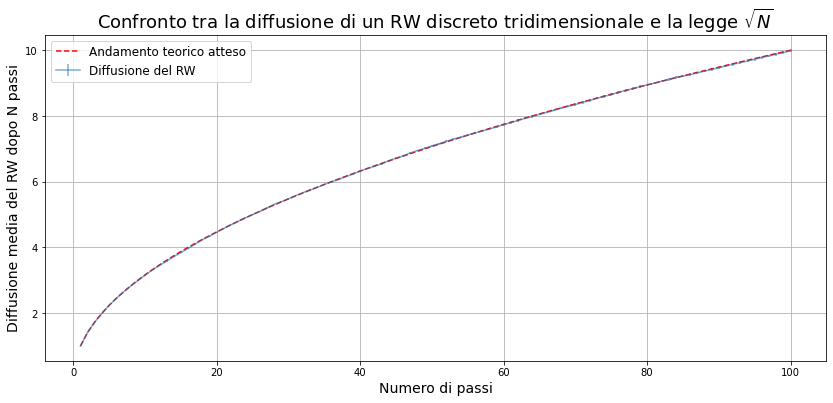

In [13]:
data = np.loadtxt('results_discrete_rw.dat')

steps = data[:, 0]
mean_distances = data[:, 1]
dev_st = data[:, 2]
sqrt_steps = np.sqrt(steps)

plt.figure(figsize=(14, 6))

plt.errorbar(steps, mean_distances, yerr=dev_st, alpha=0.6, label='Diffusione del RW')
plt.plot(steps, sqrt_steps, color='red', linestyle='--', label='Andamento teorico atteso')
plt.xlabel('Numero di passi', fontsize=14)
plt.ylabel('Diffusione media del RW dopo N passi', fontsize=14)
plt.title('Confronto tra la diffusione di un RW discreto tridimensionale e la legge $\sqrt{N}$', fontsize=18)
plt.grid(True)
plt.legend(fontsize=12)

plt.show()

Si nota come la diffusione del random walk discreto scala proprio come la radice quadrata del numero di passi. 
Ora, da questo grafico non si riesce a verificare la bontà dell'incertezza statistica, poichè non si riescono a comparare le devizioni standard della media con la discrepanza fra valori attesi e valori sperimentali. Quindi prima di tutto si può costruire un altro grafico in cui si 'zoomma' su un particolaere set di coordinate (in questo caso $x_1, x_2, y_1, y_2 = 40, 60, 6, 8$), dopodichè si costruisce un altro grafico in cui confronto la discrepanza con l'incertezza statistica.

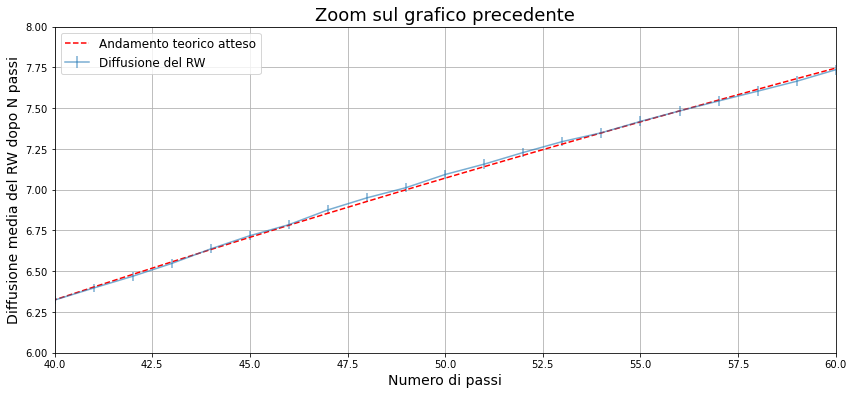

In [15]:
plt.figure(figsize=(14, 6))

plt.errorbar(steps, mean_distances, yerr=dev_st, alpha=0.6, label='Diffusione del RW')
plt.plot(steps, sqrt_steps, color='red', linestyle='--', label='Andamento teorico atteso')
plt.xlabel('Numero di passi', fontsize=14)
plt.ylabel('Diffusione media del RW dopo N passi', fontsize=14)
plt.title('Zoom sul grafico precedente', fontsize=18)
plt.grid(True)
plt.legend(fontsize=12)

# Imposto i limiti dell'asse x e dell'asse y per lo zoom
x1, x2, y1, y2 = 40, 60, 6, 8
plt.axis([x1, x2, y1, y2])

plt.show()

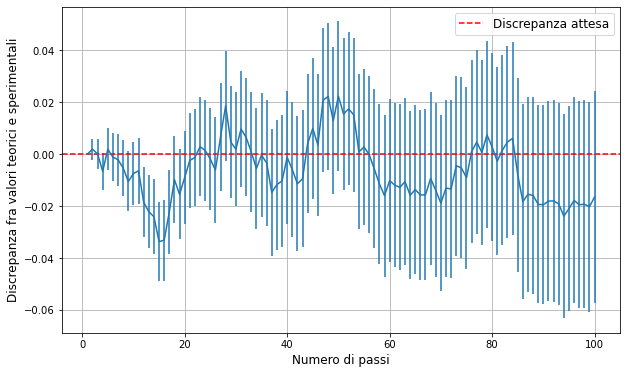

In [27]:
plt.figure(figsize=(10,6))

plt.errorbar(steps, mean_distances - sqrt_steps, yerr=dev_st)
plt.axhline(y=0, color='red', linestyle='--', label='Discrepanza attesa')
plt.xlabel('Numero di passi', fontsize=12)
plt.ylabel('Discrepanza fra valori teorici e sperimentali', fontsize=12)
plt.grid(True)

plt.legend(fontsize=12)
plt.show()

Si osserva come l'incertezza statistica è compatibile con i valori sperimentali calcolati.

Lo stesso procedimento viene eseguito per un random walk continuo.

<Figure size 576x432 with 0 Axes>

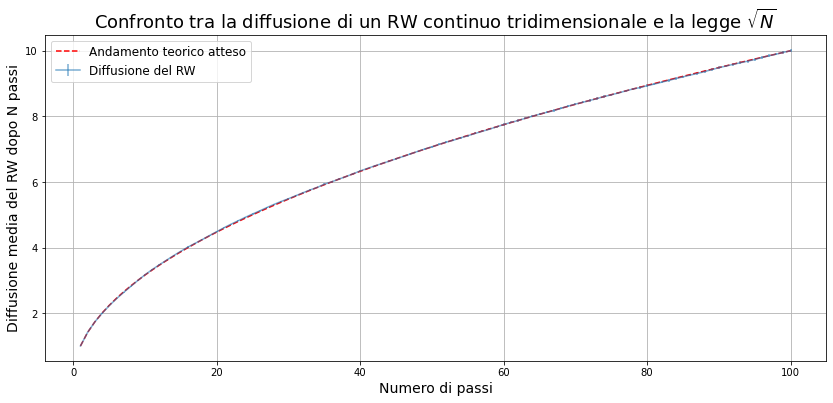

In [31]:
data = np.loadtxt('results_continuous_rw.dat')

steps = data[:, 0]
mean_distances = data[:, 1]
dev_st = data[:, 2]
sqrt_steps = np.sqrt(steps)


plt.figure(figsize=(8, 6))

plt.figure(figsize=(14, 6))

plt.errorbar(steps, mean_distances, yerr=dev_st, alpha=0.6, label='Diffusione del RW')
plt.plot(steps, sqrt_steps, color='red', linestyle='--', label='Andamento teorico atteso')
plt.xlabel('Numero di passi', fontsize=14)
plt.ylabel('Diffusione media del RW dopo N passi', fontsize=14)
plt.title('Confronto tra la diffusione di un RW continuo tridimensionale e la legge $\sqrt{N}$', fontsize=18)
plt.grid(True)
plt.legend(fontsize=12)

plt.show()

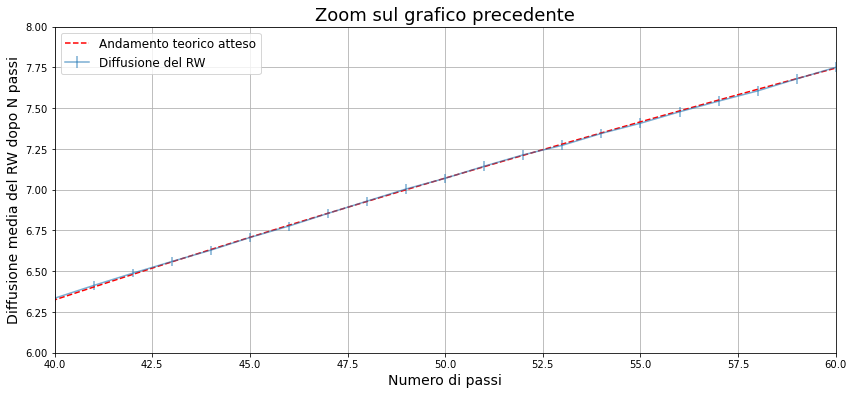

In [30]:
plt.figure(figsize=(14, 6))

plt.errorbar(steps, mean_distances, yerr=dev_st, alpha=0.6, label='Diffusione del RW')
plt.plot(steps, sqrt_steps, color='red', linestyle='--', label='Andamento teorico atteso')
plt.xlabel('Numero di passi', fontsize=14)
plt.ylabel('Diffusione media del RW dopo N passi', fontsize=14)
plt.title('Zoom sul grafico precedente', fontsize=18)
plt.grid(True)
plt.legend(fontsize=12)

# Imposto i limiti dell'asse x e dell'asse y per lo zoom
x1, x2, y1, y2 = 40, 60, 6, 8
plt.axis([x1, x2, y1, y2])

plt.show()

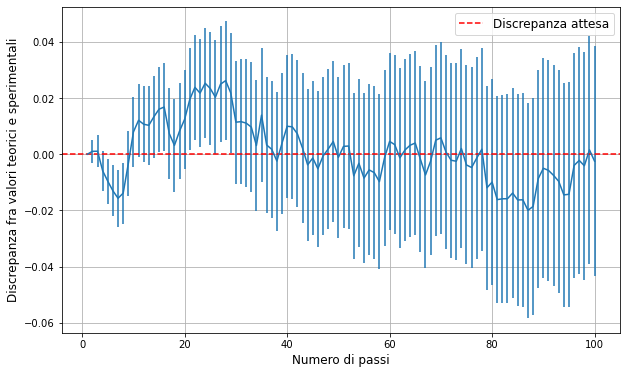

In [29]:
plt.figure(figsize=(10,6))

plt.errorbar(steps, mean_distances - sqrt_steps, yerr=dev_st)
plt.axhline(y=0, color='red', linestyle='--', label='Discrepanza attesa')
plt.xlabel('Numero di passi', fontsize=12)
plt.ylabel('Discrepanza fra valori teorici e sperimentali', fontsize=12)
plt.grid(True)

plt.legend(fontsize=12)
plt.show()

Si può certamente constatare che i random walk discreto e continuo sono stati simulati in maniera corretta.